In [1]:
import pandas as pd
data = pd.read_csv('advertising.csv')
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


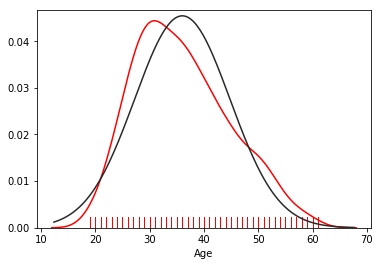

In [4]:
from scipy.stats import norm
import seaborn as sns
%matplotlib inline
sns.distplot(data['Age'], hist=False, color='r', rug=True, fit=norm)

In [5]:
object_variables = ['Ad Topic Line', 'City', 'Country']
data[object_variables].describe(include=['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Configurable fault-tolerant monitoring,Lisamouth,France
freq,1,3,9


In [6]:
pd.crosstab(index=data['Country'], columns='count').sort_values(['count'],
ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


In [7]:
data = data.drop(['Ad Topic Line', 'City', 'Country'], axis=1)

In [8]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Timestamp'].dt.month
data['Day of the month'] = data['Timestamp'].dt.day
data["Day of the week"] = data['Timestamp'].dt.dayofweek
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'], axis=1)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


In [10]:
from sklearn.model_selection import train_test_split
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
'Male', 'Month', 'Day of the month', 'Day of the week']]
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(X_train, y_train)
predictions_LR = model_1.predict(X_test)
print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions_LR))

Logistic regression accuracy: 0.906060606061

Confusion matrix:
[[158   4]
 [ 27 141]]


In [12]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_DT = model_2.predict(X_test)
print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions_DT))

Decision tree accuracy: 0.936363636364

Confusion matrix:
[[152  10]
 [ 11 157]]
